In [ ]:
import pandas as pd

df_clinico = pd.read_excel('MetaData_con_cluster_id.xlsx')
df_clinico.head()




,cluster_id,Patient ID,Age at Diagnosis,Sex,Race,Definition,Menopausal Status,Cancer Type,ER,PR,HER2,Event,Event Site,Survival Status,Survival Time (years),Subtype,Genetic Ancestry,hidden
0,0,TCGA-3C-AAAU,55,female,White,Primary solid Tumor,premenopausal,ILC,positive,positive,negative,metastasis,lung,alive,11.08,LumA,European,TCGA.3C.AAAU.01A.11R.A41B.07
1,-1,TCGA-3C-AALI,50,female,Black or African American,Primary solid Tumor,postmenopausal,IDC,positive,positive,positive,NaN,NaN,alive,10.97,Her2,African,TCGA.3C.AALI.01A.11R.A41B.07
2,-1,TCGA-3C-AALJ,62,female,Black or African American,Primary solid Tumor,postmenopausal,IDC,positive,positive,Indeterminate,NaN,NaN,alive,4.04,LumB,African_admix,TCGA.3C.AALJ.01A.31R.A41B.07
3,-1,TCGA-3C-AALK,52,female,Black or African American,Primary solid Tumor,unknown,IDC,positive,positive,positive,NaN,NaN,alive,3.96,LumA,African,TCGA.3C.AALK.01A.11R.A41B.07
4,1,TCGA-4H-AAAK,50,female,White,Primary solid Tumor,postmenopausal,ILC,positive,positive,equivocal,NaN,NaN,alive,0.95,LumA,European,TCGA.4H.AAAK.01A.12R.A41B.07


In [ ]:

df_transcript = pd.read_csv('metadata_por_cluster_eps1.2.csv')
df_transcript.head()

,cluster_id,paciente_id,Patient ID,Age at Diagnosis,Sex,Race,Definition,Menopausal Status,Cancer Type,ER,PR,HER2,Event,Event Site,Survival Status,Survival Time (years),Subtype,Genetic Ancestry,hidden
0,-1,TCGA-A2-A3XU-01,TCGA-A2-A3XU,35.0,female,Black or African American,Primary solid Tumor,postmenopausal,IDC,negative,negative,not evaluated,metastasis,bone>breast recur|chest wall,dead,2.50,Basal,African_admix,TCGA.A2.A3XU.01A.12R.A22U.07
1,-1,TCGA-AR-A2LR-01,TCGA-AR-A2LR,49.0,female,White,Primary solid Tumor,postmenopausal,metaplastic carcinoma,negative,negative,negative,NaN,NaN,alive,2.32,NaN,European,TCGA.AR.A2LR.01A.12R.A18M.07
2,-1,TCGA-B6-A3ZX-01,TCGA-B6-A3ZX,50.0,female,Black or African American,Primary solid Tumor,unknown,IDC/ILC,negative,negative,negative,metastasis,bone,dead,3.15,NaN,African,TCGA.B6.A3ZX.01A.11R.A239.07
3,-1,TCGA-OL-A5D7-01,TCGA-OL-A5D7,70.0,female,Black or African American,Primary solid Tumor,postmenopausal,IDC,negative,negative,not evaluated,NaN,NaN,alive,4.87,Basal,African_admix,TCGA.OL.A5D7.01A.11R.A27Q.07
4,-1,TCGA-E2-A570-01,TCGA-E2-A570,47.0,female,Black or African American,Primary solid Tumor,premenopausal,IDC,positive,positive,equivocal,NaN,NaN,alive,2.55,LumA,African,TCGA.E2.A570.01A.11R.A29R.07


In [ ]:
# Establecer claves únicas
ids_clinicos = set(df_clinico['Patient ID'])
ids_transcrip = set(df_transcript['Patient ID'])

# Encontrar intersección
ids_comunes = ids_clinicos.intersection(ids_transcrip)

print(f"Pacientes comunes: {len(ids_comunes)}")

# Ver ejemplos de pacientes comunes (si hay)
if ids_comunes:
    print("Ejemplos de IDs comunes:")
    print(list(ids_comunes)[:5])
else:
    print("No hay pacientes comunes entre datasets.")


Pacientes comunes: 1045
Ejemplos de IDs comunes:
['TCGA-A7-A26I', 'TCGA-AR-A0TU', 'TCGA-A1-A0SE', 'TCGA-A8-A09D', 'TCGA-AN-A0FX']


In [ ]:
# Unir por 'Patient ID' para ver si el cluster de transcriptoma se refleja en los datos clínicos
df_combinado = pd.merge(df_transcript[['Patient ID', 'cluster_id']],
                        df_clinico,
                        on='Patient ID',
                        suffixes=('_transcript', '_clinico'))

print(df_combinado.head())
save_path = 'df_combinado.xlsx'
df_combinado.to_excel(save_path, index=False)

     Patient ID  cluster_id_transcript  cluster_id_clinico  Age at Diagnosis  \
0  TCGA-A2-A3XU                     -1                  -1                35   
1  TCGA-AR-A2LR                     -1                  -1                49   
2  TCGA-B6-A3ZX                     -1                  -1                50   
3  TCGA-OL-A5D7                     -1                  -1                70   
4  TCGA-E2-A570                     -1                  -1                47   

      Sex                       Race           Definition Menopausal Status  \
0  female  Black or African American  Primary solid Tumor    postmenopausal   
1  female                      White  Primary solid Tumor    postmenopausal   
2  female  Black or African American  Primary solid Tumor           unknown   
3  female  Black or African American  Primary solid Tumor    postmenopausal   
4  female  Black or African American  Primary solid Tumor     premenopausal   

             Cancer Type        ER        PR

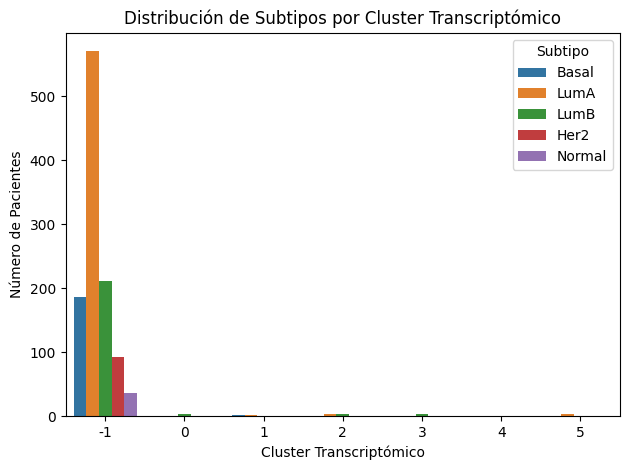

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_combinado, x='cluster_id_transcript', hue='Subtype')
plt.title('Distribución de Subtipos por Cluster Transcriptómico')
plt.xlabel('Cluster Transcriptómico')
plt.ylabel('Número de Pacientes')
plt.legend(title='Subtipo')
plt.tight_layout()
plt.show()


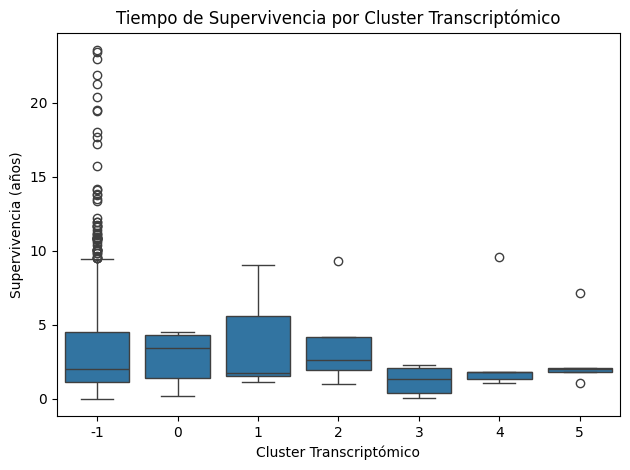

In [ ]:
sns.boxplot(data=df_combinado, x='cluster_id_transcript', y='Survival Time (years)')
plt.title('Tiempo de Supervivencia por Cluster Transcriptómico')
plt.xlabel('Cluster Transcriptómico')
plt.ylabel('Supervivencia (años)')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

tabla_chi = pd.crosstab(df_combinado['cluster_id_transcript'], df_combinado['Subtype'])
chi2, p, dof, expected = chi2_contingency(tabla_chi)

print("Chi-cuadrado:", chi2)
print("p-valor:", p)


Chi-cuadrado: 27.437901985270607
p-valor: 0.28445883536449806


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

modelo = ols('Q("Survival Time (years)") ~ C(cluster_id_transcript)', data=df_combinado).fit()
anova = sm.stats.anova_lm(modelo, typ=2)
print(anova)


                                sum_sq      df         F    PR(>F)
C(cluster_id_transcript)     26.420155     6.0  0.435327  0.855579
Residual                  13746.366053  1359.0       NaN       NaN


In [ ]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df_combinado['cluster_id_clinico'], df_combinado['cluster_id_transcript'])
print(f"Índice de Rand Ajustado: {ari:.3f}")


Índice de Rand Ajustado: 0.001


In [ ]:
import pandas as pd
import scipy.stats as stats

# Asumiendo que tu DataFrame se llama df_combinado
variables = ['ER', 'PR', 'HER2', 'Menopausal Status']

for var in variables:
    contingency = pd.crosstab(df_combinado['cluster_id_transcript'], df_combinado[var])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f'\n--- {var} ---')
    print(f'Chi-cuadrado: {chi2:.4f}')
    print(f'p-valor: {p:.4f}')
    print('Tabla de contingencia:')
    print(contingency)



--- ER ---
Chi-cuadrado: 9.5877
p-valor: 0.9445
Tabla de contingencia:
ER                     Indeterminate  negative  not evaluated  positive
cluster_id_transcript                                                  
-1                                 5       286             81       957
 0                                 0         0              0         6
 1                                 0         1              0         6
 2                                 0         1              0         7
 3                                 0         3              0         3
 4                                 0         1              0         4
 5                                 0         0              0         5

--- PR ---
Chi-cuadrado: 9.1465
p-valor: 0.9563
Tabla de contingencia:
PR                     Indeterminate  negative  not evaluated  positive
cluster_id_transcript                                                  
-1                                 7       406             81   

In [ ]:
# Agrupar por cluster_id_transcript y ver cuántos clusters clínicos hay por cada uno
agrupamiento = df_combinado.groupby('cluster_id_transcript')['cluster_id_clinico'].nunique()

print("Distribución de clusters clínicos dentro de cada cluster transcriptómico:")
print(agrupamiento)

# Si quieres ver qué pacientes están en cada combinación:
combinaciones = df_combinado.groupby(['cluster_id_transcript', 'cluster_id_clinico'])['Patient ID'].apply(list)
print("\nPacientes en cada combinación transcriptómico-clínico:")
print(combinaciones)


Distribución de clusters clínicos dentro de cada cluster transcriptómico:
cluster_id_transcript
-1    72
 0     4
 1     3
 2     6
 3     4
 4     3
 5     4
Name: cluster_id_clinico, dtype: int64

Pacientes en cada combinación transcriptómico-clínico:
cluster_id_transcript  cluster_id_clinico
-1                     -1                    [TCGA-A2-A3XU, TCGA-AR-A2LR, TCGA-B6-A3ZX, TCG...
                        0                    [TCGA-GM-A3XG, TCGA-BH-A28Q, TCGA-PE-A5DE, TCG...
                        1                    [TCGA-A7-A13H, TCGA-LL-A50Y, TCGA-AC-A3QP, TCG...
                        2                    [TCGA-BH-A0W7, TCGA-GI-A2C8, TCGA-A1-A0SD, TCG...
                        3                    [TCGA-D8-A1XD, TCGA-AO-A12A, TCGA-A2-A0T5, TCG...
                                                                   ...                        
 4                      38                                                      [TCGA-A8-A086]
 5                     -1              

    cluster_id_transcript  cluster_id_clinico  \
0                      -1                  -1   
1                      -1                   0   
2                      -1                   1   
3                      -1                   2   
4                      -1                   3   
..                    ...                 ...   
91                      4                  38   
92                      5                  -1   
93                      5                   2   
94                      5                   8   
95                      5                  68   

                                         patient_list  
0   [TCGA-A2-A3XU, TCGA-AR-A2LR, TCGA-B6-A3ZX, TCG...  
1   [TCGA-GM-A3XG, TCGA-BH-A28Q, TCGA-PE-A5DE, TCG...  
2   [TCGA-A7-A13H, TCGA-LL-A50Y, TCGA-AC-A3QP, TCG...  
3   [TCGA-BH-A0W7, TCGA-GI-A2C8, TCGA-A1-A0SD, TCG...  
4   [TCGA-D8-A1XD, TCGA-AO-A12A, TCGA-A2-A0T5, TCG...  
..                                                ...  
91                 

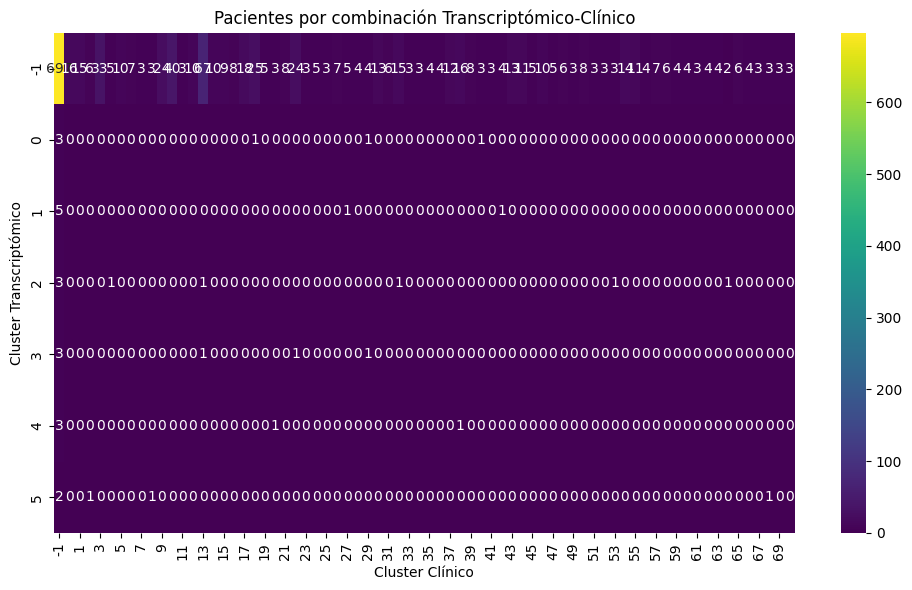

In [ ]:
combinaciones_df = combinaciones.reset_index()
combinaciones_df.columns = ['cluster_id_transcript', 'cluster_id_clinico', 'patient_list']
print(combinaciones_df)
combinaciones_count = combinaciones.apply(len).reset_index()
combinaciones_count.columns = ['cluster_id_transcript', 'cluster_id_clinico', 'num_pacientes']
print(combinaciones_count)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear tabla de frecuencias
heatmap_data = combinaciones.apply(len).unstack(fill_value=0)

# Graficar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title('Pacientes por combinación Transcriptómico-Clínico')
plt.xlabel('Cluster Clínico')
plt.ylabel('Cluster Transcriptómico')
plt.tight_layout()
plt.show()


In [ ]:
# Para ver en cuántos clusters clínicos distintos cae cada cluster transcriptómico
distribucion = df_combinado.groupby('cluster_id_transcript')['cluster_id_clinico'].nunique()
print('Clusters clínicos únicos dentro de cada cluster transcriptómico:')
print(distribucion)


Clusters clínicos únicos dentro de cada cluster transcriptómico:
cluster_id_transcript
-1    72
 0     4
 1     3
 2     6
 3     4
 4     3
 5     4
Name: cluster_id_clinico, dtype: int64


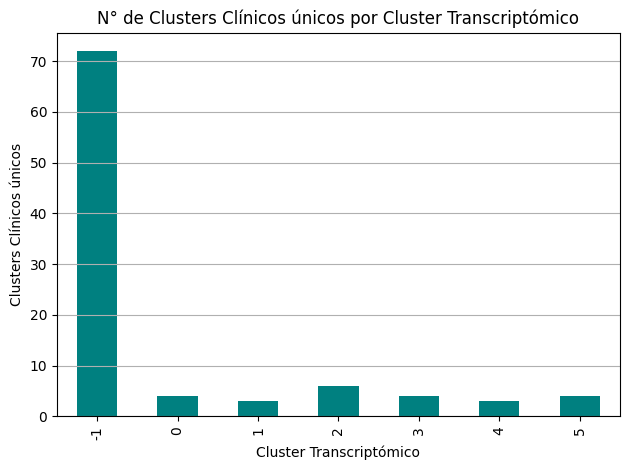

In [ ]:
import matplotlib.pyplot as plt

distribucion.sort_index().plot(kind='bar', color='teal')
plt.title('N° de Clusters Clínicos únicos por Cluster Transcriptómico')
plt.xlabel('Cluster Transcriptómico')
plt.ylabel('Clusters Clínicos únicos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Subtype                Basal  Her2  LumA  LumB
cluster_id_transcript                         
0                          0     0     0     3
1                          2     0     2     1
2                          1     0     4     3
3                          1     0     1     3
4                          0     0     1     1
5                          0     1     3     0


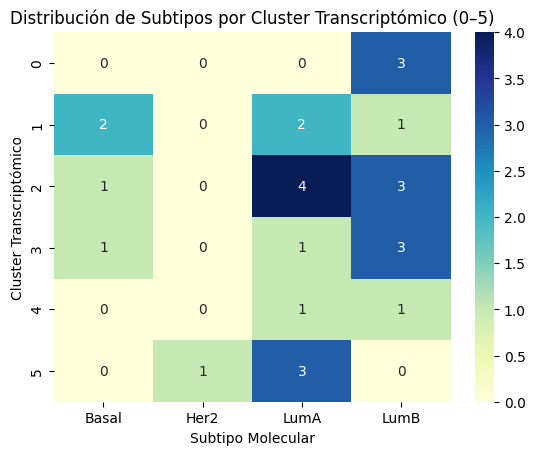

In [ ]:
df_clusters_0_5 = df_combinado[df_combinado['cluster_id_transcript'].isin(range(6))]
tabla_subtipos = pd.crosstab(df_clusters_0_5['cluster_id_transcript'], df_clusters_0_5['Subtype'])
print(tabla_subtipos)
sns.heatmap(tabla_subtipos, annot=True, cmap='YlGnBu')
plt.title('Distribución de Subtipos por Cluster Transcriptómico (0–5)')
plt.xlabel('Subtipo Molecular')
plt.ylabel('Cluster Transcriptómico')
plt.show()


cluster_id_transcript
0    2.808333
1    3.732857
2    3.463750
3    1.235000
4    3.118000
5    2.812000
Name: Survival Time (years), dtype: float64


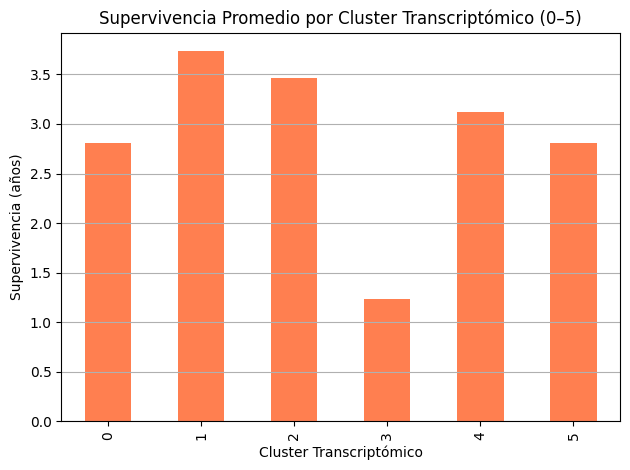

In [ ]:
supervivencia = df_clusters_0_5.groupby('cluster_id_transcript')['Survival Time (years)'].mean()
print(supervivencia)
supervivencia.plot(kind='bar', color='coral')
plt.title('Supervivencia Promedio por Cluster Transcriptómico (0–5)')
plt.xlabel('Cluster Transcriptómico')
plt.ylabel('Supervivencia (años)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


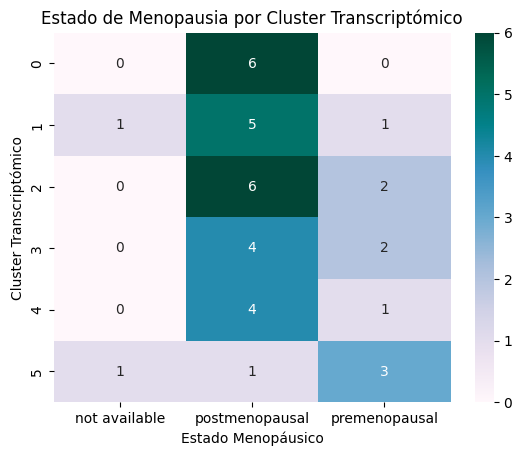

In [ ]:
menopausia = pd.crosstab(df_clusters_0_5['cluster_id_transcript'], df_clusters_0_5['Menopausal Status'])
sns.heatmap(menopausia, annot=True, cmap='PuBuGn')
plt.title('Estado de Menopausia por Cluster Transcriptómico')
plt.xlabel('Estado Menopáusico')
plt.ylabel('Cluster Transcriptómico')
plt.show()
